In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [7]:
df = pd.read_csv('/home/aayushbangroo/Downloads/Housing.csv')

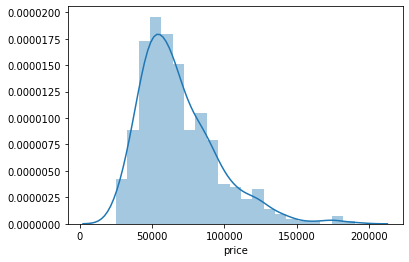

In [8]:

sns.distplot(df['price'])

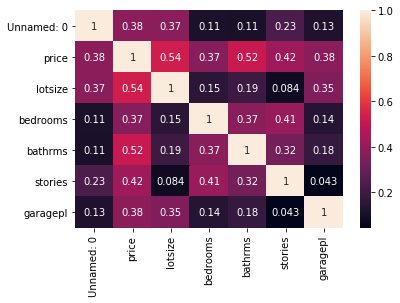

In [24]:
sns.heatmap(df.corr(),annot = True
           )

#this corr map is used to find the correlation between the attributes and the pricing so as to 
#get an idea about the relationship between them.

In [9]:
df.columns

Index(['Unnamed: 0', 'price', 'lotsize', 'bedrooms', 'bathrms', 'stories',
       'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl',
       'prefarea'],
      dtype='object')

In [10]:
x = df[['lotsize']]
#separate the other attributes from the predicting attribute

In [11]:
y = df[['price']]
#separte the predicting attribute into Y for model training

In [12]:
from sklearn.model_selection import train_test_split

#import model selection train test split for splitting the data into test and train for 
#model validation.

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression()
#loading the model constructor

In [16]:
lm.fit(x_train,y_train)
#training or fitting the train data into the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
print(lm.intercept_)

[33350.05263669]


In [18]:
lm.coef_
#examining the co-efficients of the fitted model.

array([[6.93437801]])

In [19]:
x_train.columns

Index(['lotsize'], dtype='object')

In [34]:
cdf = pd.DataFrame(data=lm.coef_.reshape(-1,1),index=x_train.columns,columns=['Coeff'])

In [35]:
cdf

,Coeff
lotsize,6.934378


In [36]:
predictions = lm.predict(x_test)


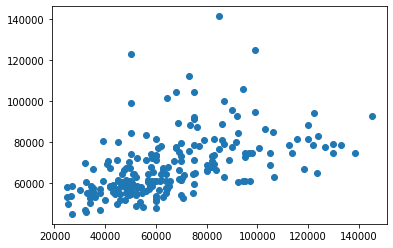

In [42]:
plt.scatter(y_test,predictions)


/usr/lib/python3/dist-packages/seaborn/distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


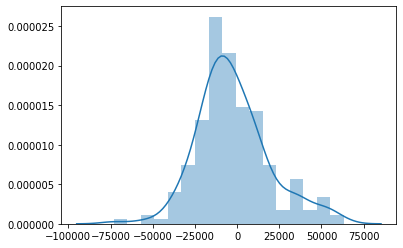

In [38]:
sns.distplot((y_test-predictions))